<a href="https://colab.research.google.com/github/ankitvermaaa/ML-Projects-/blob/main/Marketing_campaign_response_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Income  PreviousPurchases  EmailClicks  Response
0   25   30000                  1            2         0
1   26   50000                  3            4         0
2   27   70000                  5            6         1
3   28   25000                  0            5         0
4   29   52000                  2            3         1

Dataset Info:
             Age        Income  PreviousPurchases  EmailClicks   Response
count  10.00000     10.000000              10.00    10.000000  10.000000
mean   29.50000  52200.000000               3.00     4.400000   0.500000
std     3.02765  19332.183874               2.00     1.712698   0.527046
min    25.00000  25000.000000               0.00     2.000000   0.000000
25%    27.25000  36000.000000               1.25     3.250000   0.000000
50%    29.50000  51000.000000               3.00     4.500000   0.500000
75%    31.75000  68000.000000               4.75     5.750000   1.000000
max    34.00000  80000.000000               6.00     7.000

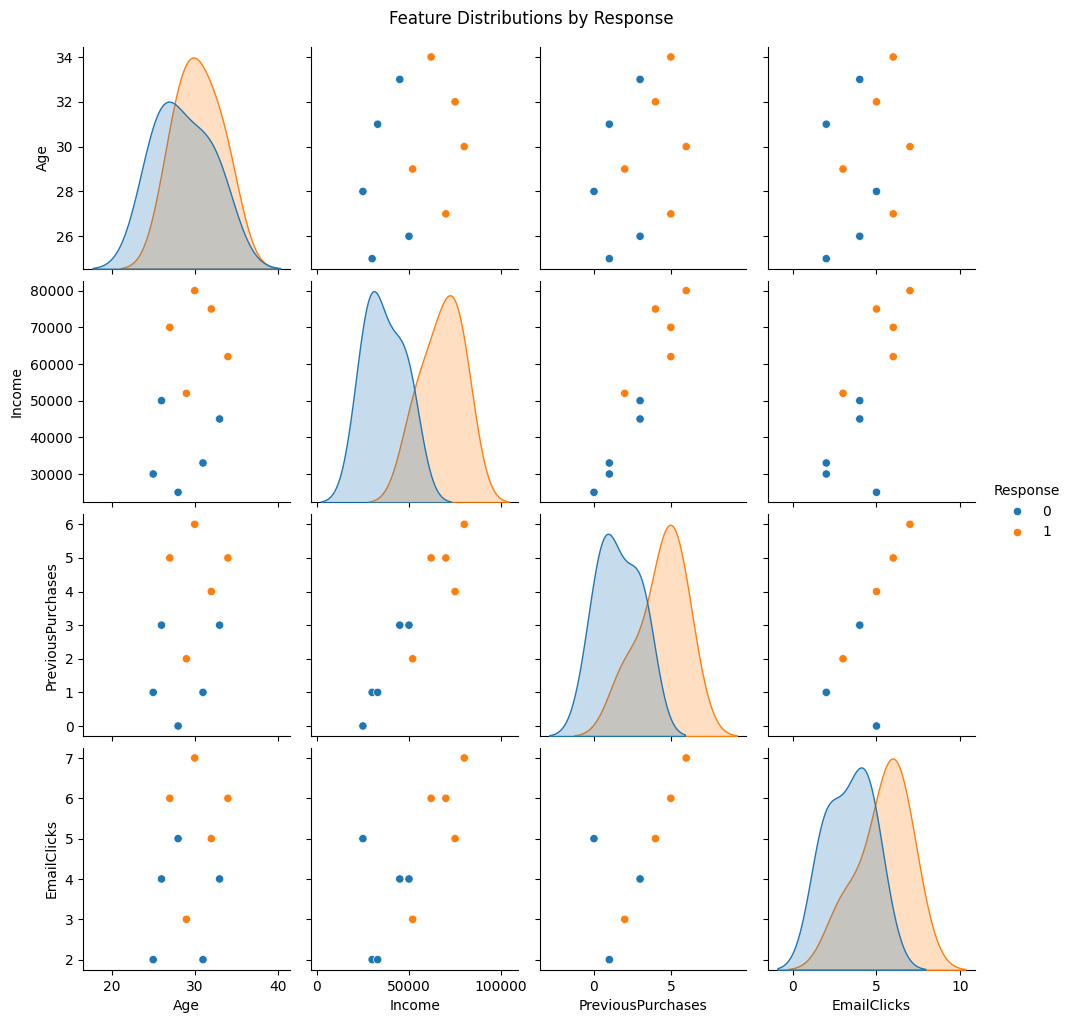

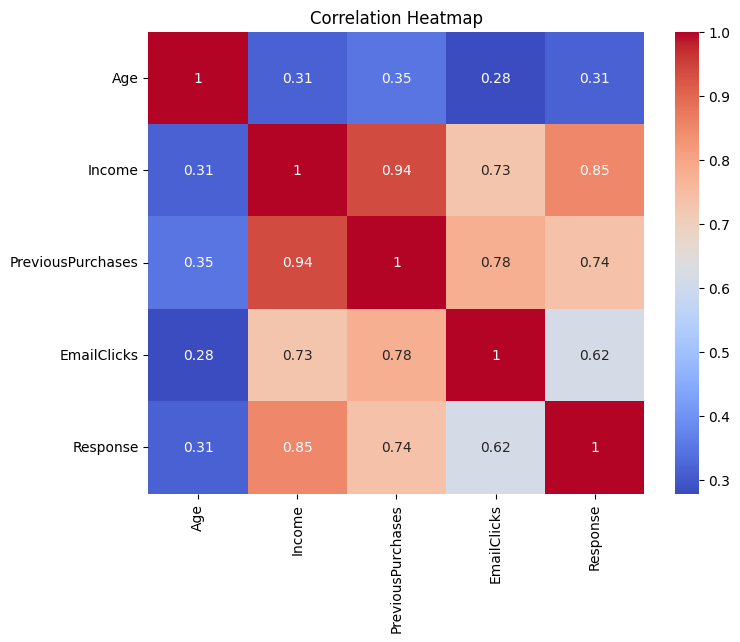

<ipython-input-10-ddb2f6d2ee51>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette='Set2')


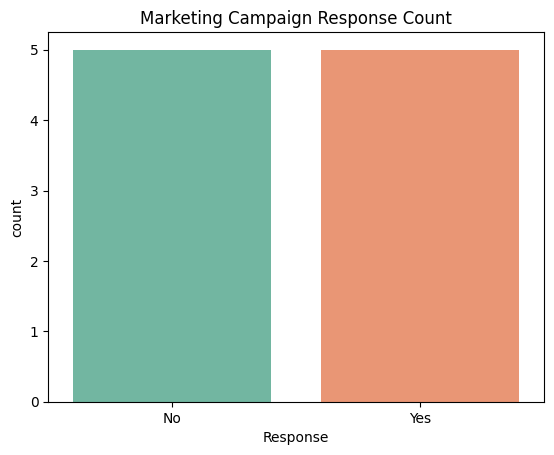

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

✅ Accuracy: 0.3333333333333333

📊 Confusion Matrix:
 [[0 2]
 [0 1]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



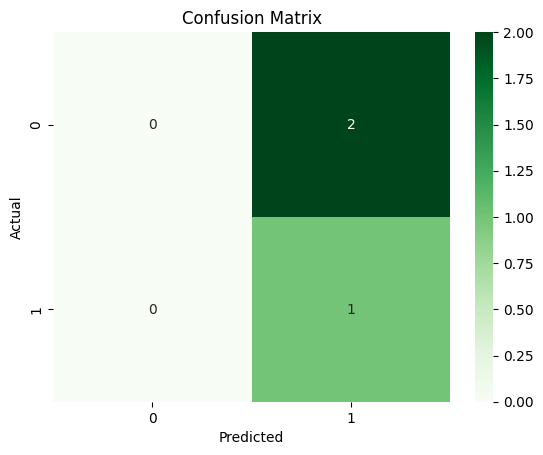

In [ ]:
# Marketing campaign response prediction....
# Step 1: Install packages (if needed)
# !pip install pandas numpy seaborn matplotlib scikit-learn

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 3: Sample Dataset (or load your own CSV)
data = {
    'Age': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
    'Income': [30000, 50000, 70000, 25000, 52000, 80000, 33000, 75000, 45000, 62000],
    'PreviousPurchases': [1, 3, 5, 0, 2, 6, 1, 4, 3, 5],
    'EmailClicks': [2, 4, 6, 5, 3, 7, 2, 5, 4, 6],
    'Response': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # Target variable
}

df = pd.DataFrame(data)

# Step 4: Explore the data
print(df.head())
print("\nDataset Info:\n", df.describe())

# Step 5: Visualizations
sns.pairplot(df, hue='Response')
plt.suptitle("Feature Distributions by Response", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Response count
sns.countplot(x='Response', data=df, palette='Set2')
plt.title("Marketing Campaign Response Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Step 6: Prepare data
X = df[['Age', 'Income', 'PreviousPurchases', 'EmailClicks']]
y = df['Response']

# Step 7: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()